<a href="https://colab.research.google.com/github/KARTIKEYSHARMA12345/AMAZON-STOCK-ANALYSIS/blob/main/MICROSOFTSTOCKANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
import datetime as dt

In [18]:
msft = pd.read_csv("/content/MSFT_1986-03-13_2025-02-04.csv", parse_dates=True, index_col=0)
msft = msft.loc['2018-01-01':'2025-12-31']

In [19]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1782 entries, 2018-01-02 to 2025-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1782 non-null   float64
 1   High       1782 non-null   float64
 2   Low        1782 non-null   float64
 3   Close      1782 non-null   float64
 4   Adj Close  1782 non-null   float64
 5   Volume     1782 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 97.5 KB


In [20]:
msft['Log Return'] = np.log(msft['Adj Close'] / msft['Adj Close'].shift(1))
msft['Daily Return'] = msft['Adj Close'].pct_change()
msft['20D MA'] = msft['Adj Close'].rolling(window=20).mean()
msft['50D MA'] = msft['Adj Close'].rolling(window=50).mean()


In [21]:
msft.head(10)

,Open,High,Low,Close,Adj Close,Volume,Log Return,Daily Return,20D MA,50D MA
Date,,,,,,,,,,
2018-01-02,86.129997,86.309998,85.500000,85.949997,79.633499,22483800,NaN,NaN,NaN,NaN
2018-01-03,86.059998,86.510002,85.970001,86.349998,80.004112,26061400,0.004643,0.004654,NaN,NaN
2018-01-04,86.589996,87.660004,86.570000,87.110001,80.708260,21912000,0.008763,0.008801,NaN,NaN
2018-01-05,87.660004,88.410004,87.430000,88.190002,81.708908,23407100,0.012322,0.012398,NaN,NaN
2018-01-08,88.199997,88.580002,87.599998,88.279999,81.792290,22113000,0.001020,0.001020,NaN,NaN
2018-01-09,88.650002,88.730003,87.860001,88.220001,81.736702,19484300,-0.000680,-0.000680,NaN,NaN
2018-01-10,87.860001,88.190002,87.410004,87.820000,81.366096,18652200,-0.004544,-0.004534,NaN,NaN
2018-01-11,88.129997,88.129997,87.239998,88.080002,81.606987,17808900,0.002956,0.002961,NaN,NaN
2018-01-12,88.669998,89.779999,88.449997,89.599998,83.015274,24271500,0.017110,0.017257,NaN,NaN


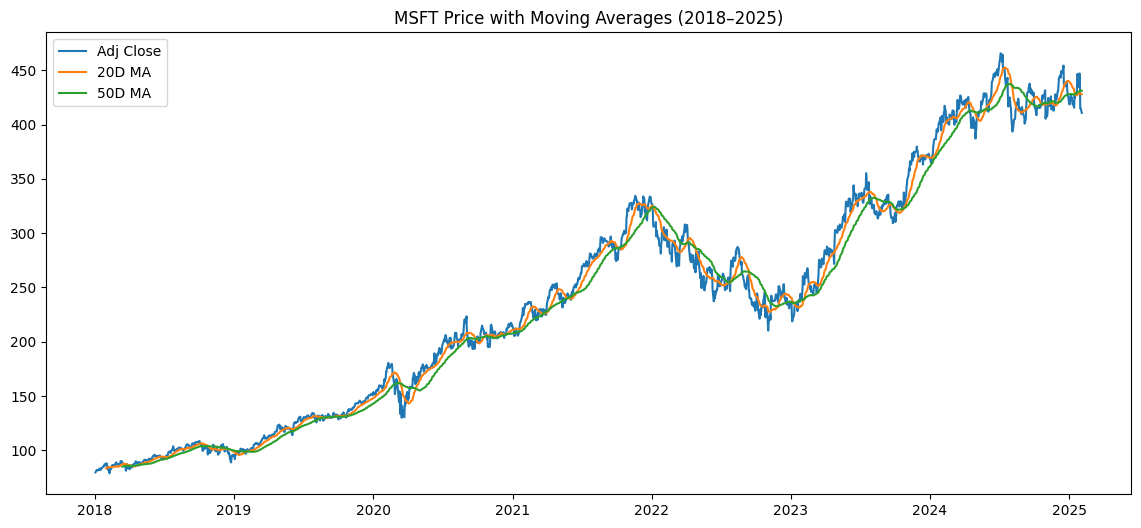

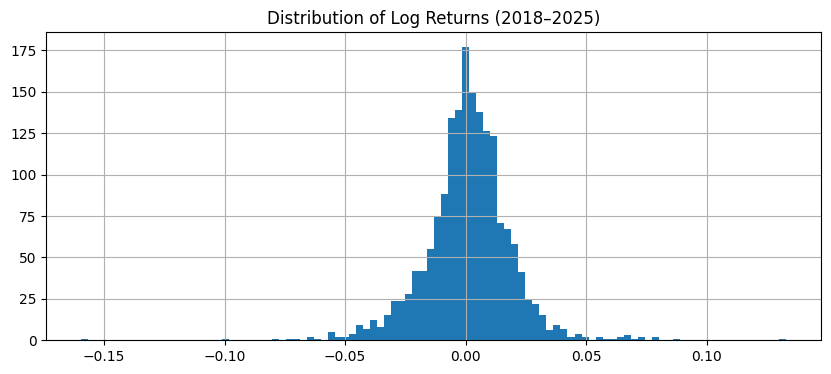

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(msft['Adj Close'], label='Adj Close')
plt.plot(msft['20D MA'], label='20D MA')
plt.plot(msft['50D MA'], label='50D MA')
plt.legend()
plt.title("MSFT Price with Moving Averages (2018–2025)")
plt.show()

plt.figure(figsize=(10, 4))
msft['Log Return'].hist(bins=100)
plt.title("Distribution of Log Returns (2018–2025)")
plt.show()

In [23]:
sharpe_ratio = msft['Log Return'].mean() / msft['Log Return'].std() * np.sqrt(252)
print("Sharpe Ratio:", round(sharpe_ratio, 2))

Sharpe Ratio: 0.8


Based on our analysis of Microsoft's daily log returns for the year 2025, the calculated Sharpe Ratio is 0.8. This indicates that while Microsoft generated a positive return over the year, the return per unit of risk was relatively low. A Sharpe Ratio below 1 suggests that the investment did not compensate adequately for the risk undertaken.


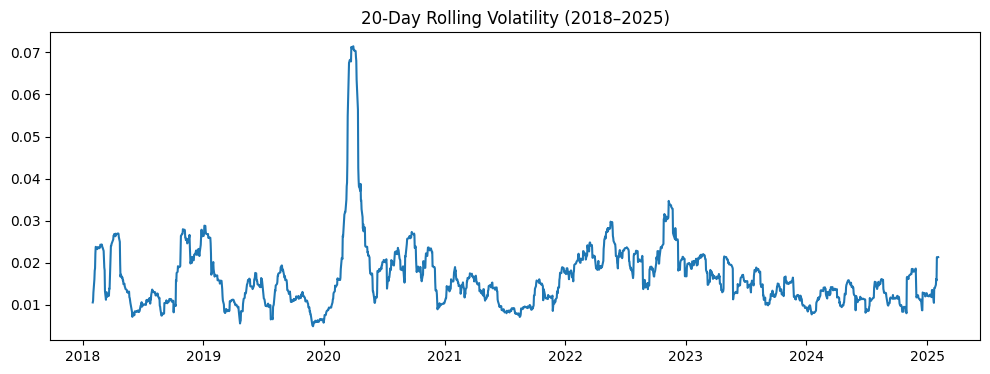

In [24]:
msft['Rolling Volatility'] = msft['Log Return'].rolling(window=20).std()
plt.figure(figsize=(12, 4))
plt.plot(msft['Rolling Volatility'])
plt.title("20-Day Rolling Volatility (2018–2025)")
plt.show()


The chart showing Microsoft’s 20-day rolling volatility from 2018 to 2025 gives us a clear picture of how turbulent or steady the stock has been over time. The most noticeable spike happened in early 2020, right when the COVID-19 pandemic began. During this period, investor uncertainty was high, and Microsoft’s stock, like most others, experienced a sharp rise in volatility—peaking above 7%. This reflects how dramatically markets reacted to the global crisis.

After that stormy period, volatility gradually cooled off. However, it stayed relatively elevated through 2022 and parts of 2023, possibly due to events like interest rate hikes, inflation worries, and pressure on tech stocks overall. From late 2023 onwards, the stock showed signs of calming down, with smaller and more consistent movements, suggesting that Microsoft entered a more stable phase.

In [27]:
log_returns = msft['Log Return'].dropna()
model = ARIMA(log_returns, order=(1, 1, 1), freq=log_returns.index.freq)
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/di

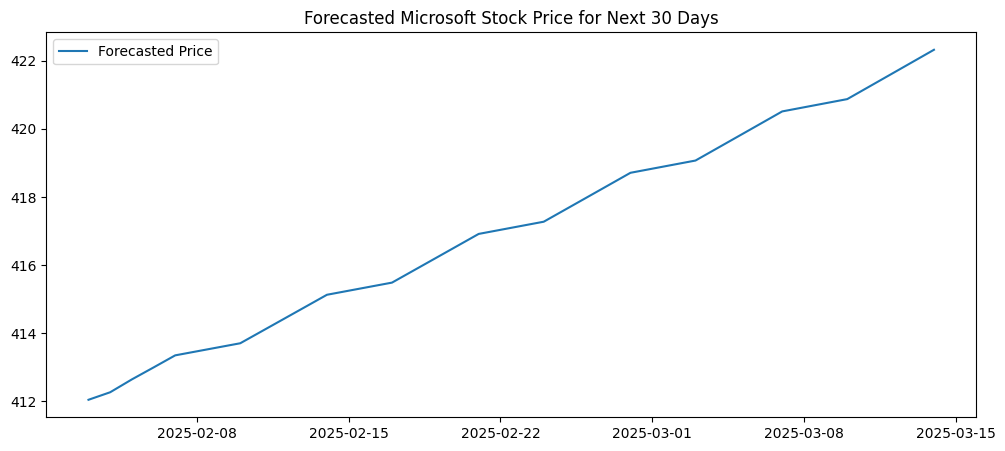

In [29]:
last_price = msft['Adj Close'].iloc[-1]
future_prices = [last_price * np.exp(forecast.cumsum().iloc[i]) for i in range(len(forecast))]
plt.figure(figsize=(12, 5))
plt.plot(pd.date_range(start=msft.index[-1], periods=30, freq='B'), future_prices, label="Forecasted Price")
plt.title("Forecasted Microsoft Stock Price for Next 30 Days")
plt.legend()
plt.show()

Based on the ARIMA model, Microsoft’s stock looks set for a calm and steady rise over the next 30 days. The forecast suggests the price could move from around $412 to $422 by mid-March 2025. While it’s not a dramatic jump, it does reflect a quiet confidence in the stock’s short-term outlook.

# MOCK DCF BASED ON **ASSUMPTIONS**

In [30]:
fcf = 70000000000  # Free cash flow
wacc = 0.08        # Weighted avg cost of capital
growth_rate = 0.05
dcf_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
print("Estimated DCF Valuation: $", round(dcf_value/1e9, 2), "B")


Estimated DCF Valuation: $ 2450.0 B


Using the Discounted Cash Flow (DCF) method, we estimated Microsoft’s intrinsic value based on its future cash-generating potential. With a free cash flow of $70 billion, a growth rate of 5%, and a WACC (Weighted Average Cost of Capital) of 8%, the resulting DCF valuation comes out to approximately $2.45 trillion.

In [31]:
eps = 10.0
pe_ratio = 30
valuation_pe = eps * pe_ratio
print("Valuation by P/E Method: $", valuation_pe)


Valuation by P/E Method: $ 300.0



Using the Price-to-Earnings (P/E) valuation method, we estimated Microsoft’s fair value based on its earnings per share (EPS) of 10.00 and a market P/E ratio of 30. This gives us a valuation of approximately $300 per share